In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

<h1>LOADING FROM FILE</h1>

In [135]:
def load(N, skip_count):
    with open('3.XDATCAR', 'r') as file:
        lines = file.readlines()

    lines = lines[7:]
    lines = [line.strip() for line in lines if not line.startswith('Direct')]

    data = []
    for i in range(skip_count, len(lines), 178):
        block = lines[i:i+N]  # Wybór ostatnich 178 wierszy z bloku
        data.extend(block)

    pos = pd.DataFrame([line.split()[:3] for line in data], columns=['x', 'y', 'z'])
    pos = pos.astype(float)

    return pos

<h1>APPLYING BOUNDARY CONDITIONS</h1>

In [136]:
# Zmiana współrzędnych ze względu na warunki brzegowe
def changeCoordinates(pos, N, k):
    # skalery z wektorow własne przestrzeni
    a1 = 12.060673
    a2 = 12.060673
    a3 = 16.080897

    for j in range(0, N):
        # dla j-tego atomu 
        # m - indeksy kolejnych położeń j-tego atomu
        m=j
        for i in range(1, k):
            
            #Warunki brzegowe
            if (abs(pos.at[m+N, 'x']-pos.at[m, 'x'])) > 0.5:
                pos.at[m+N, 'x'] = 1-pos.at[m+N, 'x'] 
            if (abs(pos.at[m+N, 'y']-pos.at[m, 'y'])) > 0.5:
                pos.at[m+N, 'y'] = 1-pos.at[m+N, 'y'] 
            if (abs(pos.at[m+N, 'z']-pos.at[m, 'z'])) > 0.5:
                pos.at[m+N, 'z'] = 1-pos.at[m+N, 'z'] 

            pos.at[m, 'x'] = pos.at[m, 'x']*a1
            pos.at[m, 'y'] = pos.at[m, 'y']*a2
            pos.at[m, 'z'] = pos.at[m, 'z']*a3

            if(i==k-1):
                pos.at[m+N, 'x'] = pos.at[m+N, 'x']*a1
                pos.at[m+N, 'y'] = pos.at[m+N, 'y']*a2
                pos.at[m+N, 'z'] = pos.at[m+N, 'z']*a3

            m+=N
        m=0

<h3><span style="color:green">CHARGE DIFFUSION</span></h3>

In [137]:
# liczba atomów tlenu
N_self = 106

self_diff_pos = load(N_self, 72)

self_diff_pos.to_csv('self_diff_pos.csv')

# ilość kroków symulacji
k_self = int(len(self_diff_pos.index)/N_self)
print(k_self)

2500


In [138]:
self_diff_pos

,x,y,z
0,0.176498,0.497075,0.762760
1,0.153734,0.994900,0.368784
2,0.831087,0.330591,0.898295
3,0.327225,0.819688,0.141153
4,0.816292,0.986640,0.860693
...,...,...,...
264995,0.658652,0.810028,0.399653
264996,0.136312,0.158823,0.245664
264997,0.839483,0.316671,0.651315
264998,0.182957,0.005516,0.118504


In [139]:
changeCoordinates(self_diff_pos, N_self, k_self)

In [140]:
print(self_diff_pos)

                x          y          z
0        2.128686   5.995063  12.265871
1        1.854138  11.999165   5.930377
2       10.023463   3.987151  14.445382
3        3.946552   9.885990   2.269872
4        9.845034  11.899547  13.840713
...           ...        ...        ...
264995   7.943791   9.769482   6.426776
264996   1.644014   1.915513   3.950504
264997  10.124727   3.819267  10.473730
264998   2.206587  11.994147   1.905646
264999   6.064550   4.044929   2.084181

[265000 rows x 3 columns]


<h3><span style="color:orange">TRACER DIFFUSION</span></h3>

In [145]:
# liczba atomów tlenu
N_tracer = 178

tracer_diff_pos = load(N_tracer, 0)

tracer_diff_pos.to_csv('tracer_diff_pos.csv')

# ilość kroków symulacji
k_tracer = int(len(tracer_diff_pos.index)/N_tracer)
print(k_tracer)

2500


In [146]:
tracer_diff_pos

,x,y,z
0,0.978550,0.985724,0.771501
1,0.344557,0.630872,0.972851
2,0.952924,0.667955,0.752671
3,0.004456,0.031512,0.239915
4,0.018660,0.362175,0.509307
...,...,...,...
444995,0.658652,0.810028,0.399653
444996,0.136312,0.158823,0.245664
444997,0.839483,0.316671,0.651315
444998,0.182957,0.005516,0.118504


In [147]:
changeCoordinates(tracer_diff_pos, N_tracer, k_tracer)

In [148]:
print(tracer_diff_pos)

                x          y          z
0       11.801975  11.888489  12.406426
1        4.155586   7.608744  15.644323
2       11.492900   8.055982  12.103622
3        0.053741   0.380057   3.858053
4        0.225054   4.368077   8.190112
...           ...        ...        ...
444995   7.943791   9.769482   6.426776
444996   1.644014   1.915513   3.950504
444997  10.124727   3.819267  10.473730
444998   2.206587  11.994147   1.905646
444999   6.064550   4.044929   2.084181

[445000 rows x 3 columns]


<h1>Change to numpy array</h1>

In [149]:
self_diff_array = self_diff_pos.to_numpy()
tracer_diff_array = tracer_diff_pos.to_numpy()

In [150]:
print(self_diff_array)
print(len(self_diff_array))
print(tracer_diff_array)
print(len(tracer_diff_array))

[[ 2.12868623  5.99506253 12.26587095]
 [ 1.8541384  11.99916514  5.93037688]
 [10.02346263  3.98715067 14.44538246]
 ...
 [10.12472718  3.81926743 10.47372959]
 [ 2.2065872  11.99414657  1.90564644]
 [ 6.06454998  4.04492889  2.08418074]]
265000
[[11.80197506 11.88848928 12.4064257 ]
 [ 4.15558569  7.60874391 15.64432284]
 [11.49290017  8.05598249 12.10362209]
 ...
 [10.12472718  3.81926743 10.47372959]
 [ 2.2065872  11.99414657  1.90564644]
 [ 6.06454998  4.04492889  2.08418074]]
445000


<h3><span style=color:pink>Change to three dimensional array</span></h3>

In [151]:
def change_to_3D(pos_array, TS, N):
    sub_array = np.zeros((N, 3))
    new_pos_array = np.zeros((TS, N, 3))

    i=0
    for idx, elem in enumerate(pos_array):
        sub_array[idx%N] = pos_array[idx]
        if idx!=0 and idx % N == 0:
            new_pos_array[i] = sub_array
            i=i+1
        if idx==len(pos_array)-1:
            new_pos_array[i] = sub_array

    return new_pos_array

In [255]:
new_self_diff_array = change_to_3D(self_diff_array, k_self, N_self)
new_tracer_diff_array = change_to_3D(tracer_diff_array, k_tracer, N_tracer)

In [153]:
print(new_self_diff_array.shape)
print(new_tracer_diff_array.shape)

(2500, 106, 3)
(2500, 178, 3)


In [154]:
print(new_self_diff_array)

[[[ 2.11520457  5.93905698 12.17588289]
  [ 1.8541384  11.99916514  5.93037688]
  [10.02346263  3.98715067 14.44538246]
  ...
  [10.20005199  3.92191859 10.20280394]
  [ 1.51598523 11.96125796  2.09036818]
  [ 5.98547502  3.96480261  2.25921326]]

 [[ 2.0964378   5.90726602 12.05348298]
  [ 1.92730869 11.98122259  5.83760023]
  [ 9.97420033  4.03547224 14.410649  ]
  ...
  [10.40104998  3.88099576 10.16402695]
  [ 1.36006292 11.94854685  1.84699732]
  [ 5.97049506  3.94685138  2.27257472]]

 [[ 2.09334183  5.91996759 12.01350491]
  [ 2.00912528 11.94536669  5.79571866]
  [ 9.94701606  4.11585868 14.37621691]
  ...
  [10.61669409  3.92434592 10.08003836]
  [ 1.27321558 11.9049433   1.64004116]
  [ 5.97403909  3.94912168  2.26003837]]

 ...

 [[ 1.67389333  5.85502943 11.99702729]
  [ 2.05452431 10.51551867  8.07820516]
  [ 9.81940461  4.21226832 14.48127823]
  ...
  [10.30329883  4.05243196 10.28930888]
  [ 1.95175302 12.02666359  1.94719738]
  [ 6.02989448  4.16445921  2.12139756]]

 [

In [155]:
print(new_tracer_diff_array)

[[[11.73375797 11.77744836 12.40740793]
  [ 4.15558569  7.60874391 15.64432284]
  [11.49290017  8.05598249 12.10362209]
  ...
  [10.20005199  3.92191859 10.20280394]
  [ 1.51598523 11.96125796  2.09036818]
  [ 5.98547502  3.96480261  2.25921326]]

 [[11.67514659 11.66538722 12.38350448]
  [ 4.15172519  7.53834202 15.66274785]
  [11.53225222  8.03745428 12.13425604]
  ...
  [10.40104998  3.88099576 10.16402695]
  [ 1.36006292 11.94854685  1.84699732]
  [ 5.97049506  3.94685138  2.27257472]]

 [[11.64327916 11.56989491 12.33425785]
  [ 4.12839816  7.48514372 15.70992663]
  [11.59818032  8.04001103 12.15727472]
  ...
  [10.61669409  3.92434592 10.08003836]
  [ 1.27321558 11.9049433   1.64004116]
  [ 5.97403909  3.94912168  2.26003837]]

 ...

 [[11.89673167 11.77929545 12.3511711 ]
  [ 4.23582547  8.737507   15.67240973]
  [11.89861627  8.1159677  12.12974326]
  ...
  [10.30329883  4.05243196 10.28930888]
  [ 1.95175302 12.02666359  1.94719738]
  [ 6.02989448  4.16445921  2.12139756]]

 [

In [156]:
print(new_self_diff_array[:][0])

[[ 2.11520457  5.93905698 12.17588289]
 [ 1.8541384  11.99916514  5.93037688]
 [10.02346263  3.98715067 14.44538246]
 [ 3.94655167  9.88599002  2.26987152]
 [ 9.84503354 11.89954687 13.84071323]
 [ 6.04174348  6.50935604 12.06893399]
 [ 2.03560666  3.9525603   6.19548863]
 [ 9.88450921 10.26989607 11.95141865]
 [ 4.0694632   1.60479954  5.79091546]
 [11.97501617  1.9652652  14.58601521]
 [10.12021311  7.24584091  0.96042032]
 [ 4.28731139 10.15984195  5.60950123]
 [ 9.6618886   9.62633965  3.88873944]
 [10.14087184  8.00531392 14.17061573]
 [12.05145286  6.13273149 14.11534713]
 [ 5.76627385  0.04421165 13.96238467]
 [ 0.07427976  2.08914001  5.62339111]
 [ 7.91341991 10.08458962  1.60958217]
 [ 4.11509126  2.10702876 14.01242891]
 [ 8.01436666  1.64674668 14.07834515]
 [ 8.29937737 10.29982053  6.09821883]
 [ 6.22565862  8.13497182  5.82167275]
 [10.13776332  3.96183351  6.16143364]
 [ 8.55310474  7.01682538  6.26159045]
 [10.12576428  0.10462344 10.14339243]
 [ 3.9585272   5.82547198

In [157]:
print((new_self_diff_array[0].T)[0]) # X dla 1 timestepu

[ 2.11520457  1.8541384  10.02346263  3.94655167  9.84503354  6.04174348
  2.03560666  9.88450921  4.0694632  11.97501617 10.12021311  4.28731139
  9.6618886  10.14087184 12.05145286  5.76627385  0.07427976  7.91341991
  4.11509126  8.01436666  8.29937737  6.22565862 10.13776332  8.55310474
 10.12576428  3.9585272  10.23958241  1.84626012  6.03089648  2.1997049
  6.0371351   6.24405621  8.10323874  2.22782014  2.37807056  9.92306115
  2.07782854  8.10680713  1.90975004  2.05979953  0.03260313  6.31396928
  1.87753019  2.17280683  7.8710615   6.29502558 10.58232298  8.07116471
  6.02100419  2.3658549   4.25845286  5.59369033 10.10620005  0.04447518
  6.30221965  4.17717622 10.26251205 11.8503392   5.81758961  2.0622628
  9.81934792  8.10981506 12.03242473  4.06904855  1.91978645 10.47214403
  4.05062141  7.96012752  0.08446427 12.00601463  2.25548298  9.66554117
  6.24829771  0.0218385   4.1678374   6.43925808 11.61113698  5.92437878
  3.98540682  5.89723154  6.37894844 10.6303516   2.0

In [158]:
print((new_tracer_diff_array[0].T)[0]) # X dla 1 timestepu

[11.73375797  4.15558569 11.49290017  0.05374139  0.22505421  7.97106052
  8.07243819  4.21869195  3.84891715  3.95668698  3.89370361  4.08399583
  8.07962346  7.68383607  4.15791485  7.9724393   4.00897989  3.75600293
  4.15629727 11.80697071  7.75562072 11.65530244  0.35794594  7.85042653
  7.8208768   7.69968874  0.58586721  7.62949587 11.93171799  0.82208514
  0.03289356  7.91353123  4.26002569  7.68839597 11.86629318  3.98131403
 10.03626709 10.06158172  5.82589977  6.12993125  5.90660943  5.8796367
  2.47195409  5.88546912  1.97964297  5.94662397  6.14342171  5.92208641
  9.7417106  10.08107502  5.70430877 10.06854181  1.92205627  2.05516172
  9.93501195 10.11193575 10.00451724 10.03067383  9.89939316  2.05916067
  2.11186063  2.07618419  1.92518457  6.02264698  2.17798061  5.92527272
 10.26469756  5.77560399  1.86104518  1.97587027  9.94488108  2.27402687
  2.12868623  1.8541384  10.02346263  3.94655167  9.84503354  6.04174348
  2.03560666  9.88450921  4.0694632  11.97501617 10.

<h1><span style=color:orange>Visualized positions of atoms</span></h1>

<h3><span style=color:green>Charge diffusion</span></h3>

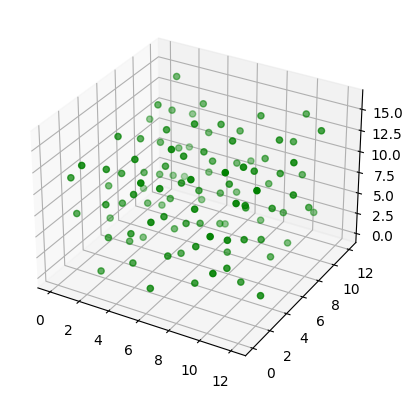

In [162]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(*new_self_diff_array[0].T, color='green')

plt.show()

<h3><span style=color:orange>Tracer diffusion</span></h3>

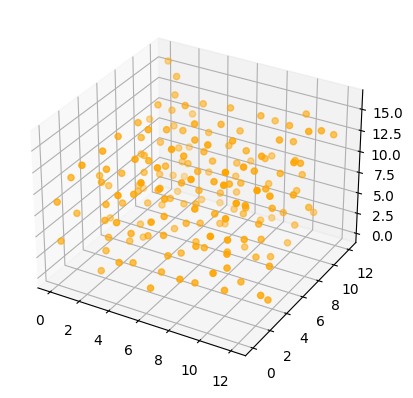

In [161]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(*new_tracer_diff_array[0].T, color='orange')

plt.show()

<h1>TIME ARRAY</h1>

In [296]:
dt = 10*10**(-15)

time = dt*np.ones(k_self)
time_array = np.cumsum(time)
print(len(time_array))

2500


<h1>Positions of atoms</h1>

In [311]:
self_diff_array[0::N_self][:, 0]
len(self_diff_array[2497::N_self][:, 0])

2477

5.99506252907017


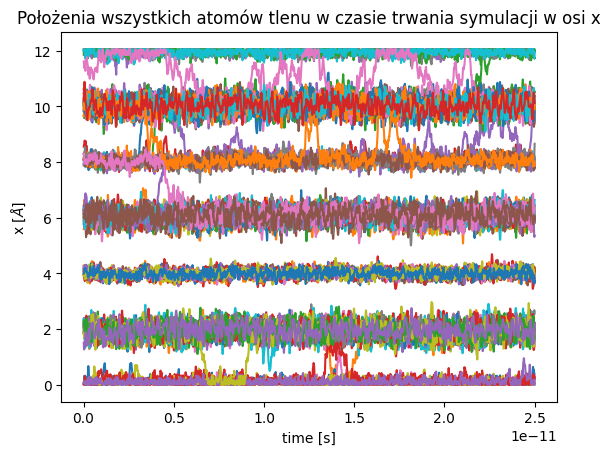

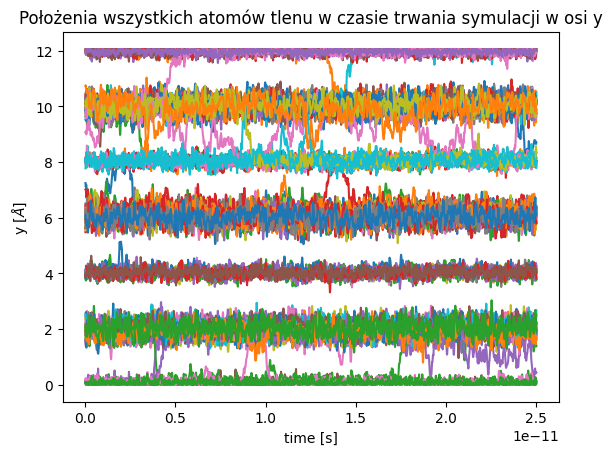

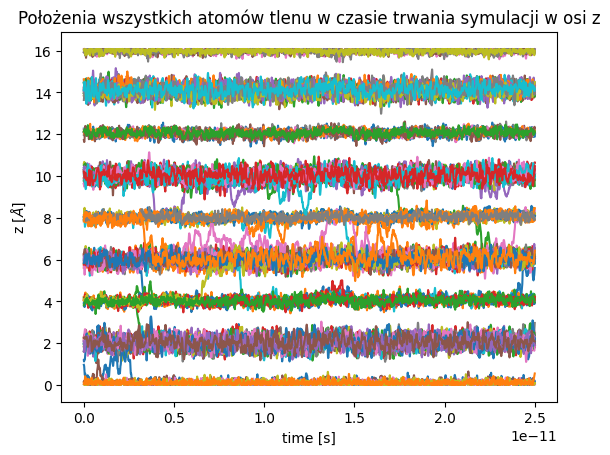

In [312]:
print(self_diff_array[0][1])

plt.figure(1)
for i in range(N_self):
    plt.title("Położenia wszystkich atomów tlenu w czasie trwania symulacji w osi x")
    arrayx = self_diff_array[i::N_self][:, 0]
    plt.ylabel(r'x [$ \AA$]')
    plt.xlabel(r'time [s]')
    plt.plot(time_array, arrayx)
plt.figure(2)
for i in range(N_self):
    plt.title("Położenia wszystkich atomów tlenu w czasie trwania symulacji w osi y")
    arrayy = self_diff_array[i::N_self][:, 1]
    plt.ylabel(r'y [$ \AA$]')
    plt.xlabel(r'time [s]')
    plt.plot(time_array, arrayy)
plt.figure(3)
for i in range(N_self):
    plt.title("Położenia wszystkich atomów tlenu w czasie trwania symulacji w osi z")
    arrayz = self_diff_array[i::N_self][:, 2]
    plt.ylabel(r'z [$ \AA$]')
    plt.xlabel(r'time [s]')
    plt.plot(time_array, arrayz)

In [289]:
tracer_diff_array

array([[11.80197506, 11.88848928, 12.4064257 ],
       [ 4.15558569,  7.60874391, 15.64432284],
       [11.49290017,  8.05598249, 12.10362209],
       ...,
       [10.12472718,  3.81926743, 10.47372959],
       [ 2.2065872 , 11.99414657,  1.90564644],
       [ 6.06454998,  4.04492889,  2.08418074]])

In [283]:
tracer_diff_array[0::N_tracer][:, :]

array([[11.80197506, 11.88848928, 12.4064257 ],
       [11.73375797, 11.77744836, 12.40740793],
       [11.67514659, 11.66538722, 12.38350448],
       ...,
       [11.90997923, 11.76631539, 12.33777233],
       [11.89673167, 11.77929545, 12.3511711 ],
       [11.89238814, 11.82459811, 12.34537249]])

In [284]:
tracer_diff_array[0::N_tracer][:19, 0]

array([11.80197506, 11.73375797, 11.67514659, 11.64327916, 11.64468471,
       11.67778281, 11.72998201, 11.78649905, 11.83307206, 11.86123409,
       11.87368758, 11.87770005, 11.88650156, 11.91293952, 11.95697208,
       12.0064774 , 12.04756655, 12.04313895, 12.02049649])

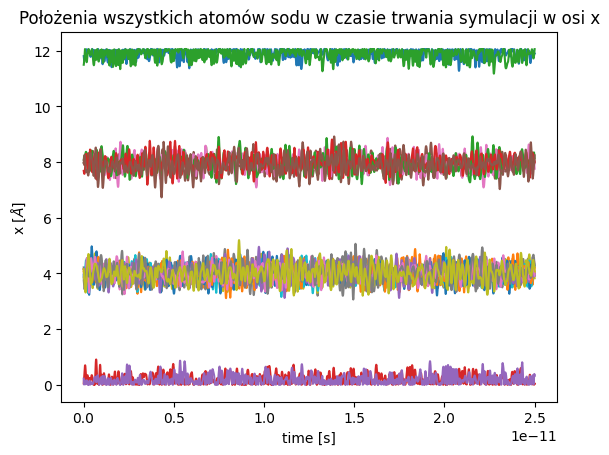

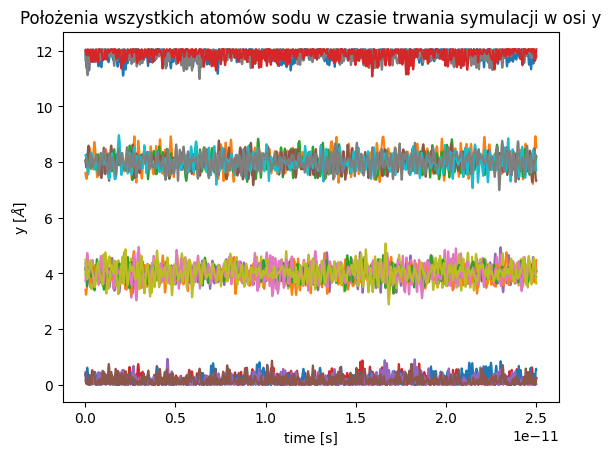

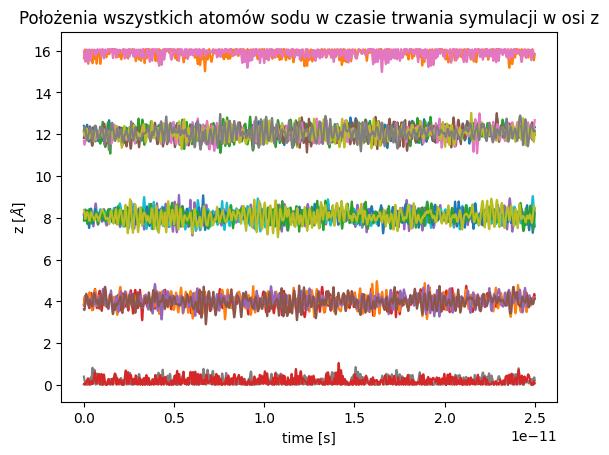

In [318]:
plt.figure(1)
for i in range(19):
    plt.title("Położenia wszystkich atomów sodu w czasie trwania symulacji w osi x")
    arrayx = tracer_diff_array[i::N_tracer][:, 0]
    plt.ylabel(r'x [$ \AA$]')
    plt.xlabel(r'time [s]')
    plt.plot(time_array, arrayx)
plt.figure(2)
for i in range(19):
    plt.title("Położenia wszystkich atomów sodu w czasie trwania symulacji w osi y")
    arrayy = tracer_diff_array[i::N_tracer][:, 1]
    plt.ylabel(r'y [$ \AA$]')
    plt.xlabel(r'time [s]')
    plt.plot(time_array, arrayy)
plt.figure(3)
for i in range(19):
    plt.title("Położenia wszystkich atomów sodu w czasie trwania symulacji w osi z")
    arrayz = tracer_diff_array[i::N_tracer][:, 2]
    plt.ylabel(r'z [$ \AA$]')
    plt.xlabel(r'time [s]')
    plt.plot(time_array, arrayz)

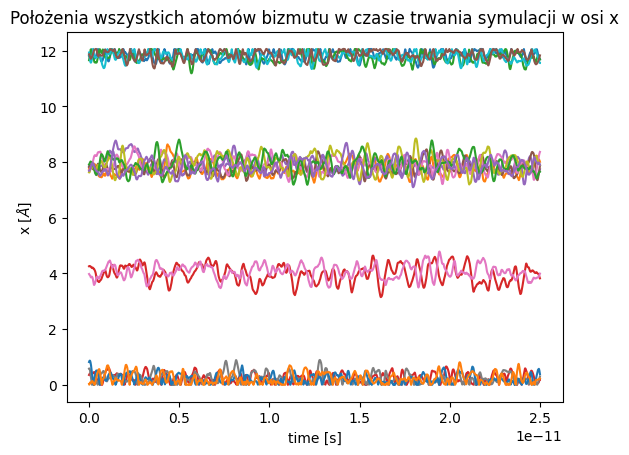

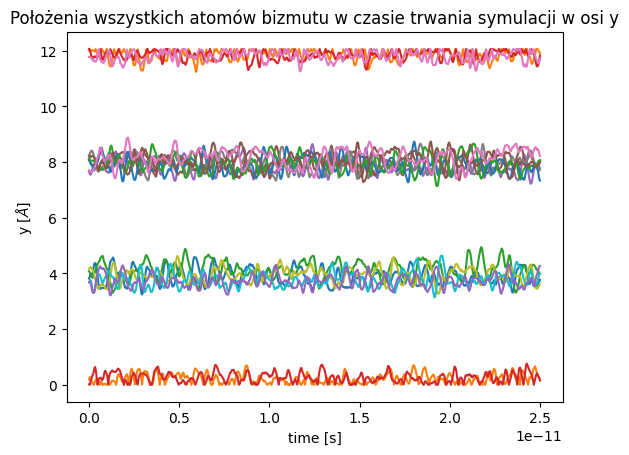

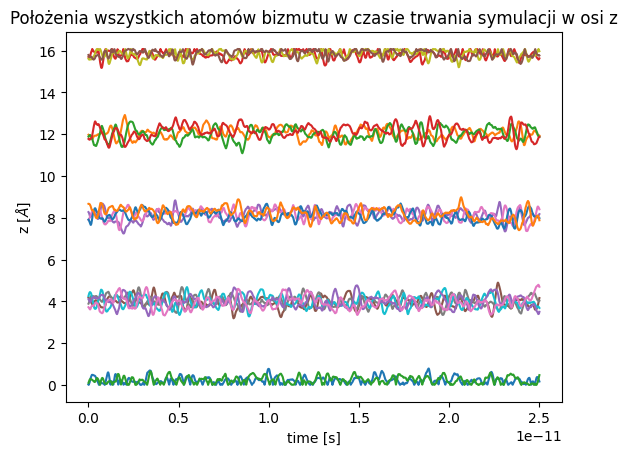

In [317]:
plt.figure(1)
for i in range(19, 19+17):
    plt.title("Położenia wszystkich atomów bizmutu w czasie trwania symulacji w osi x")
    arrayx = tracer_diff_array[i::N_tracer][:, 0]
    plt.ylabel(r'x [$ \AA$]')
    plt.xlabel(r'time [s]')
    plt.plot(time_array, arrayx)
plt.figure(2)
for i in range(19, 19+17):
    plt.title("Położenia wszystkich atomów bizmutu w czasie trwania symulacji w osi y")
    arrayy = tracer_diff_array[i::N_tracer][:, 1]
    plt.ylabel(r'y [$ \AA$]')
    plt.xlabel(r'time [s]')
    plt.plot(time_array, arrayy)
plt.figure(3)
for i in range(19, 19+17):
    plt.title("Położenia wszystkich atomów bizmutu w czasie trwania symulacji w osi z")
    arrayz = tracer_diff_array[i::N_tracer][:, 2]
    plt.ylabel(r'z [$ \AA$]')
    plt.xlabel(r'time [s]')
    plt.plot(time_array, arrayz)

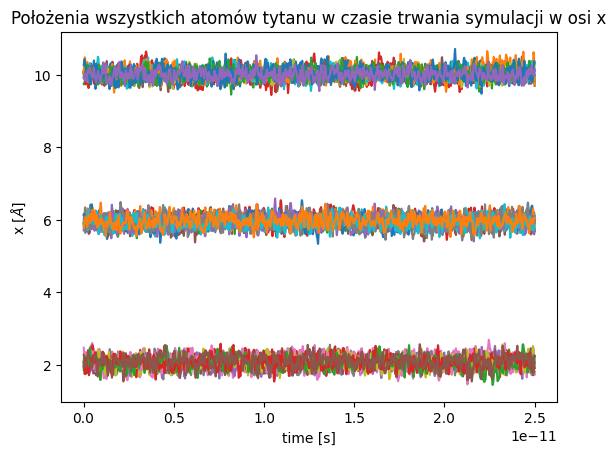

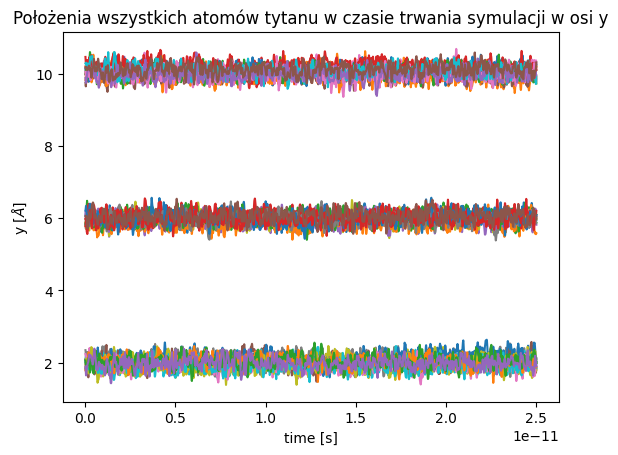

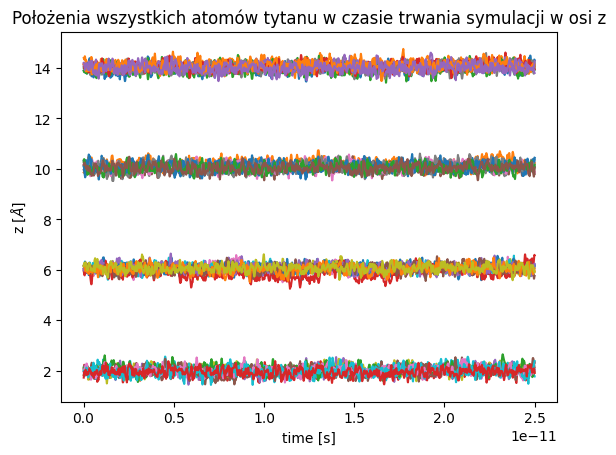

In [316]:
plt.figure(1)
for i in range(19+17, 19+17+36):
    plt.title("Położenia wszystkich atomów tytanu w czasie trwania symulacji w osi x")
    arrayx = tracer_diff_array[i::N_tracer][:, 0]
    plt.ylabel(r'x [$ \AA$]')
    plt.xlabel(r'time [s]')
    plt.plot(time_array, arrayx)
plt.figure(2)
for i in range(19+17, 19+17+36):
    plt.title("Położenia wszystkich atomów tytanu w czasie trwania symulacji w osi y")
    arrayy = tracer_diff_array[i::N_tracer][:, 1]
    plt.ylabel(r'y [$ \AA$]')
    plt.xlabel(r'time [s]')
    plt.plot(time_array, arrayy)
plt.figure(3)
for i in range(19+17, 19+17+36):
    plt.title("Położenia wszystkich atomów tytanu w czasie trwania symulacji w osi z")
    arrayz = tracer_diff_array[i::N_tracer][:, 2]
    plt.ylabel(r'z [$ \AA$]')
    plt.xlabel(r'time [s]')
    plt.plot(time_array, arrayz)

<h1><span style=color:LightBlue>MEAN SQUARED DISPLACEMENT</span></h1>

In [19]:
# Obliczanie normy euklidesowej
def Calculate_Norm(vec):
    return np.linalg.norm(vec)

In [172]:
def Calculate_MSD_Array(array, N, k):
    MSD_Array = np.array([])
   
    # po rozmiarze okna
    for w in range(1, k):
        MSD_Sub = np.array([])
        # po kroku czasowym
        for step in range(0, k-w):
            sum_of_displacements = 0
            # po cząstkach
            for c in range(0, N):
                sum_of_displacements+=Calculate_Norm(array[step+w][c]-array[step][c])**2
            MSD = sum_of_displacements/N 
            MSD_Sub = np.append(MSD_Sub, MSD)
        MSD_total = np.mean(MSD_Sub) 
        # print(MSD_total)
        MSD_Array = np.append(MSD_Array, MSD_total)

    return MSD_Array

<h1><span style=color:pink>PLOTTING</span></h1>

In [174]:
def plot(array):
    plt.plot(time_array[1:], array)
    plt.title("Mean Squared Displacement")

    p = np.polyfit(time_array[1:], array, 1)

    Y = np.polyval(p, time_array[1:])

    plt.plot(time_array[1:], Y)
    plt.ylabel("MSD")
    plt.xlabel("time [s]")

    D=p[0]*10**(-20)/6

    print(D, "m^2/s")

<h3> MSD of sodium particles:</h3>

<h3> MSD of bismuth particles:</h3>

<h3> MSD of titan particles:</h3>

<h3> MSD of oxygen particles: <span style=color:green>Charge diffusion</span></h3>

In [173]:
MSD_Array_Self = Calculate_MSD_Array(new_self_diff_array, N_self, k_self)

6.452089808289562e-11 m^2/s


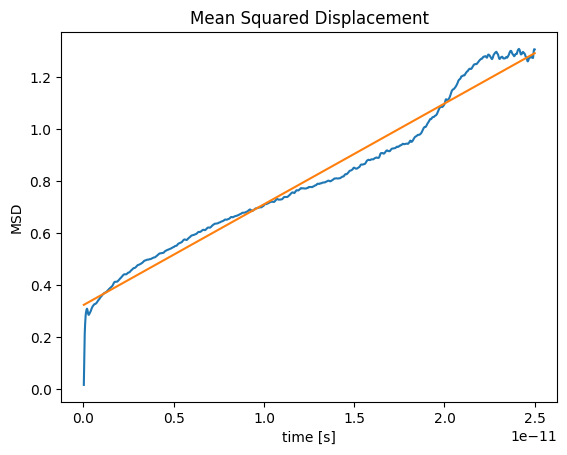

In [175]:
plot(MSD_Array_Self)

<h3>Comparison of MSD values </h3>

<h3> MSD of all particles: <span style=color:orange>Tracer diffusion</span></h3>

In [176]:
MSD_Array_Traser = Calculate_MSD_Array(new_tracer_diff_array, N_tracer, k_tracer)

3.865205870466933e-11 m^2/s


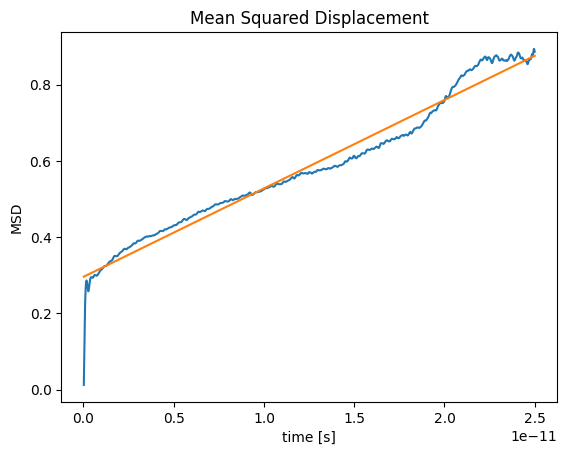

In [177]:
plot(MSD_Array_Traser)

3.865205870466933e-11 m^2/s


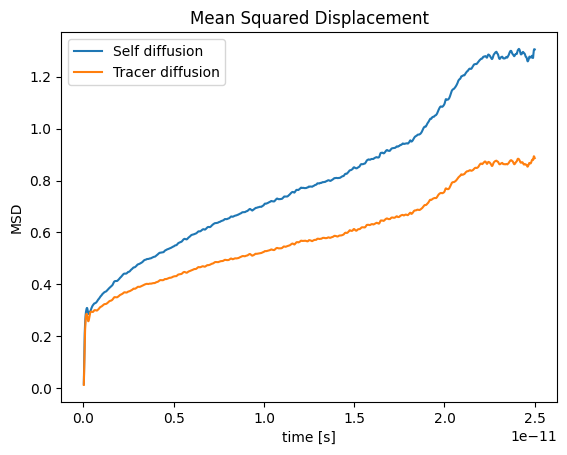

In [178]:
plt.plot(time_array[1:], MSD_Array_Self, label="Self diffusion")
plt.plot(time_array[1:], MSD_Array_Traser, label="Tracer diffusion")
plt.title("Mean Squared Displacement")

plt.ylabel("MSD")
plt.xlabel("time [s]")

D=p[0]*10**(-20)/6

plt.legend()

print(D, "m^2/s")

<h1><span style=color:CornflowerBlue>Velocities</span></h1>

In [190]:
def calculate_velocities(array, k, N):
    #################
    # prędkości dla 2-1 kroków czasowych
    # prędkości dla 3-2 kroków czasowych
    # prędkości dla 4-3 kroków czasowych
    # ...
    ################

    velocities = np.zeros(shape=(k-1, N, 3))

    for idx, _ in enumerate(velocities):
        for c in range(0, N):
            velocities[idx][c] = (array[idx+1][c]-array[idx][c])/dt

    return velocities

<h1><span style=color:LightGreen>GREEN-KUBO</span></h1>

In [263]:
def calculate_autocorrelation(velocities, N, k):
    cv = np.zeros(shape=(k))

    # cv = np.array([velocities[0][0]*velocities[0][0]+velocities[0][0]*velocities[0][1]+...])

    # for every time step
    for step in range(0, k-1):
        cv_sum = 0
        # for every atom
        for c in range(0, N):
            cv_sum+=velocities[step][c]@velocities[0][c]
        cv[step] = cv_sum/N

    return cv

In [248]:
from scipy import integrate

In [249]:
def make_plot(cv):
    plt.plot(time_array, cv)
    plt.title('Funkcja autokorelacji')
    plt.xlabel('time t')

    D = np.abs(1/3*integrate.simps(cv, dx=dt, even='avg'))
    print(D)

In [258]:
new_self_diff_array = new_self_diff_array*10**(-10)
new_tracer_diff_array = new_tracer_diff_array*10**(-10)

<h1><span style=color:LightGreen>Green-Kubo Charge Diffusion</span></h1>

In [264]:
self_diff_velocities = calculate_velocities(new_self_diff_array, k_self, N_self)
cv_self_diffusion = calculate_autocorrelation(self_diff_velocities, N_self, k_self)

3.572460109091758e-09


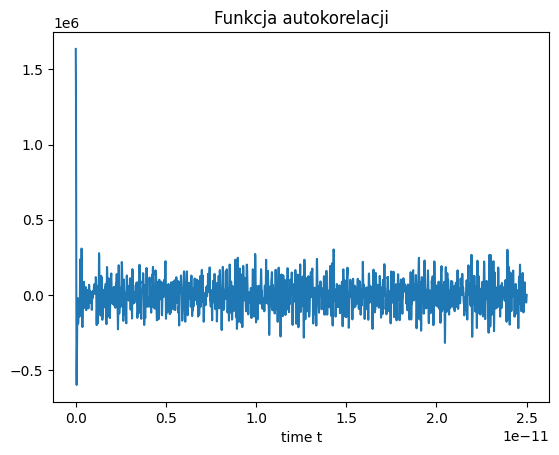

In [265]:
make_plot(cv_self_diffusion)

<h1><span style=color:orange>Green-Kubo Tracer Diffusion</span></h1>

In [266]:
tracer_diff_velocities = calculate_velocities(new_tracer_diff_array, k_tracer, N_tracer)
cv_tracer_diffusion = calculate_autocorrelation(tracer_diff_velocities, N_tracer, k_tracer)

2.3980665151997646e-09


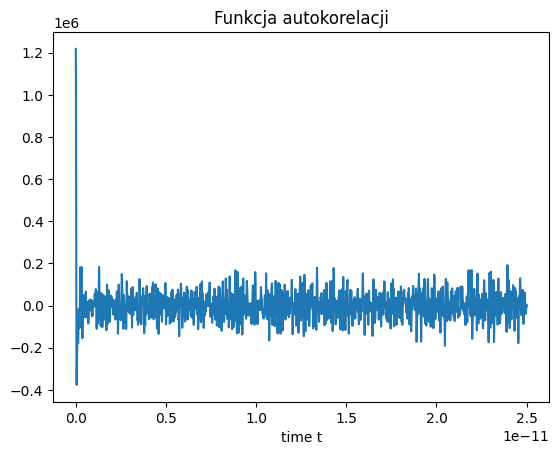

In [267]:
make_plot(cv_tracer_diffusion)